### Deadline 23.01.2022

# Первая нейросетка

Ну что ж, пришло время построить свою первую нейронную сеть. У нас будет искуственная задачка и мы посмотрим на её примере, как работают различные алгоритмы машинного обучения.

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv('data.csv', index_col=0)

In [3]:
df.head()

x1        x2  y
0 -4.626272 -6.658988  0
1 -7.789640  0.262519  0
2 -8.739678  1.537758  0
3 -2.546441 -7.705224  0
4 -2.751506 -7.940187  0

Как и в любой задаче машинного обучения для начала надо визуализировать данные. 
Не зря же нашу нейронную сеть мы так долго учим?


<AxesSubplot:xlabel='x1', ylabel='x2'>

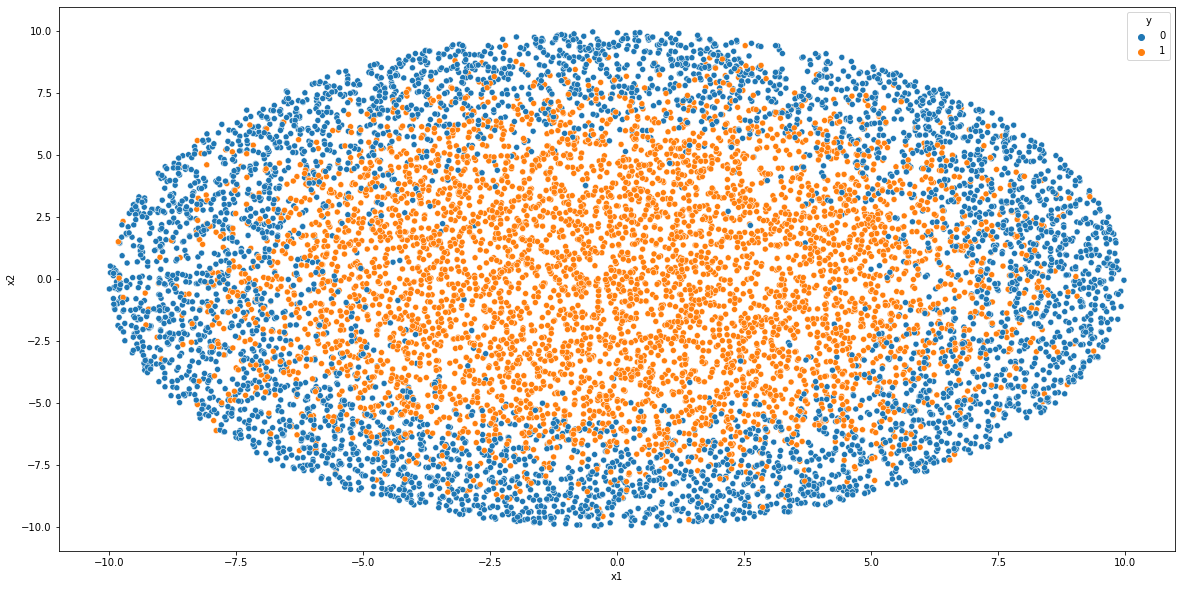

In [3]:
plt.figure(figsize=(20, 10))
sns.scatterplot(x="x1", y="x2", hue="y", data = df)

После просмотра данных встает несколько вопросов:
 * 1) Можем ли мы построить идеальную модель ? (условная метрика точность)
 * 2) Что ещё мы хотим знать о выборке?
 * 3) Какие алгоритмы машинного обучения мы можем эффективно здесь использовать?

1. Нет - выборка двухмерная, провести границу так, чтобы объекты рыжего класса не попадали к объектам синего класса, невозможно, ну только если сделать очень переобученное дерево (но зачем). Правда, если нас интересует только точность определения объектов рыжего класса, то это можно (с сильной потерей реколла)
2. <s>Почему она такая ровно-овальная</s>
3. Нелинейные, то есть деревья (или нейронки)

После описательного анализа приступим к построению моделей. Для начала посмотрим, что нам даст Логистическая регрессия. 

In [12]:
from sklearn.model_selection import train_test_split 
from sklearn.metrics import accuracy_score

# разобьем выборку на трэйн/тест
X_train, X_test, y_train, y_test = train_test_split(df[['x1','x2']], df['y'], test_size = 0.33)

Точность нашей модели 0.5918181818181818


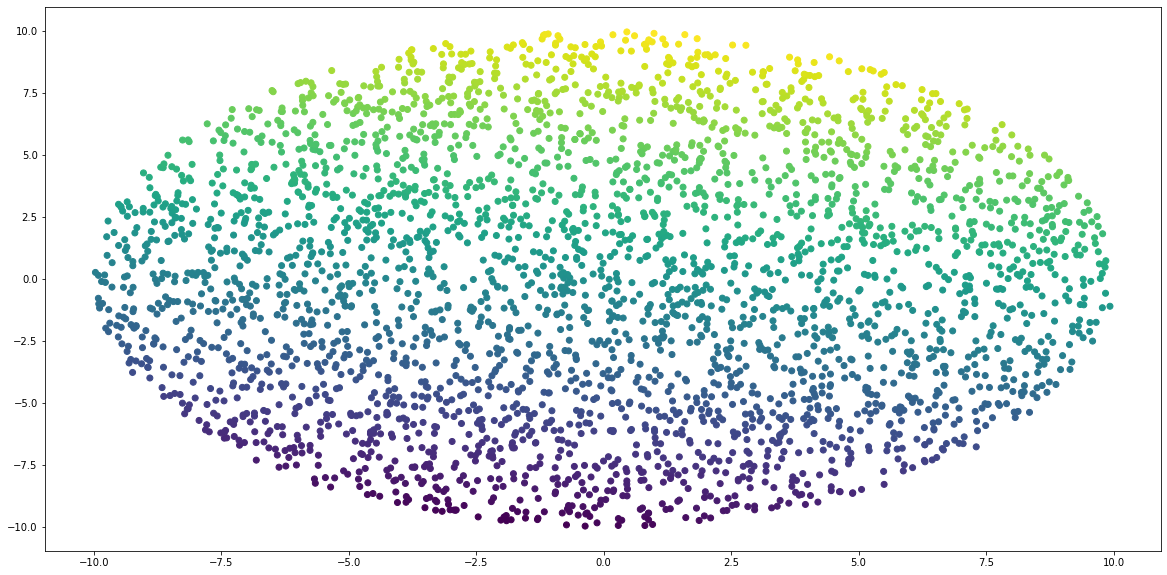

In [13]:
from sklearn.linear_model import LogisticRegression


#########################################
# Ваш код для Логистической регрессии
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
predict_logit = logreg.predict(X_test)
predict_log_proba = logreg.predict_proba(X_test)[:, 1]

#########################################


print(f'Точность нашей модели {accuracy_score(predict_logit, y_test)}')

# Заодно завизуализируем полученные результаты
plt.figure(figsize=(20, 10))
plt.scatter(X_test['x1'], X_test['x2'], c=predict_log_proba)
plt.show()

Фигня какая-то получилась... если это то, что надо было визуализировать - просто с predict_proba ничего не хотело строиться из-за размерности массива

Вообще машинное обучение не только про алгоритмы (нейронные сети не исключение),
 а скорее про обработку данных. Что нам надо добавить, чтобы наш алгоритм отработал без проблем?

Точность нашей модели 0.6742424242424242


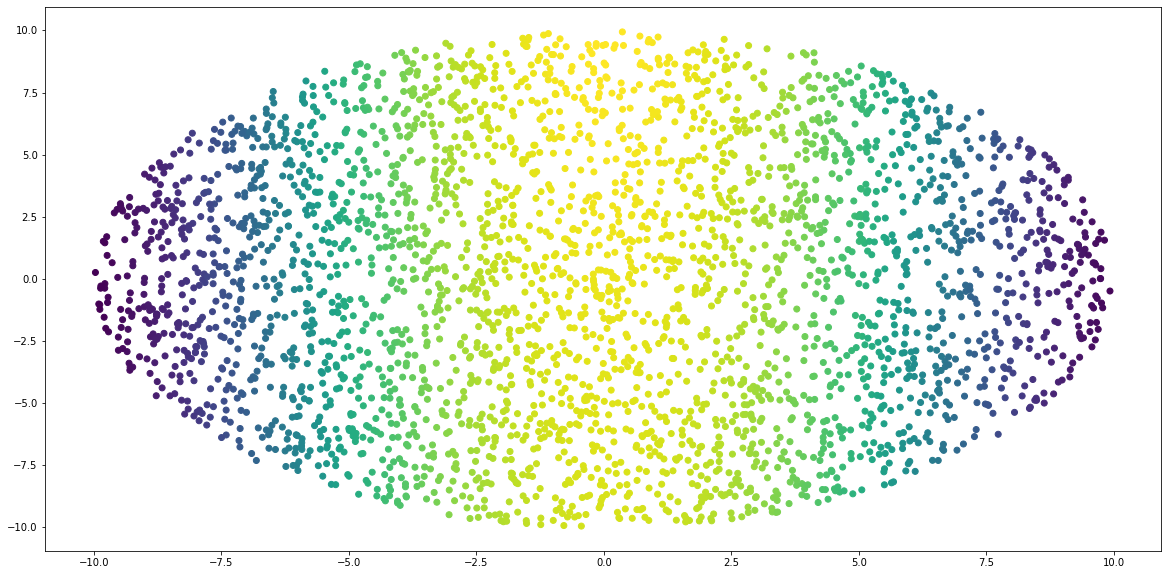

In [14]:
# Повторяем наш код, только с новыми фичами - смотрим на магию
df_new = df.copy()

#########################################
# ваш код для фичей и новой модели

df_new['new_feature_1'] = df_new['x1'].apply(lambda x: x ** 2) # типа нелинейности немношк

X_train_new, X_test_new, y_train_new, y_test_new = train_test_split(df_new[['x1', 'x2', 'new_feature_1']],
                                                                    df_new['y'], test_size = 0.33)

logreg = LogisticRegression()
logreg.fit(X_train_new, y_train_new)
predict_logit = logreg.predict(X_test_new)
predict_log_proba = logreg.predict_proba(X_test_new)[:, 1]

#########################################

print(f'Точность нашей модели {accuracy_score(predict_logit,y_test_new)}')

plt.figure(figsize=(20, 10))
plt.scatter(X_test_new['x1'], X_test_new['x2'], c = predict_log_proba)
plt.show()

Переходим к следующиму классу алгоритмов - деревья решений. Какая особенность есть у деревьев? Какой параметр надо зафикисировать, чтобы эта особенность не испортила обучение? 

ПЕРЕОБУЧЕНИЕ.... дерево мне щас всю выборку просто выучит

но я его постригу

Точность нашей модели 0.8045454545454546


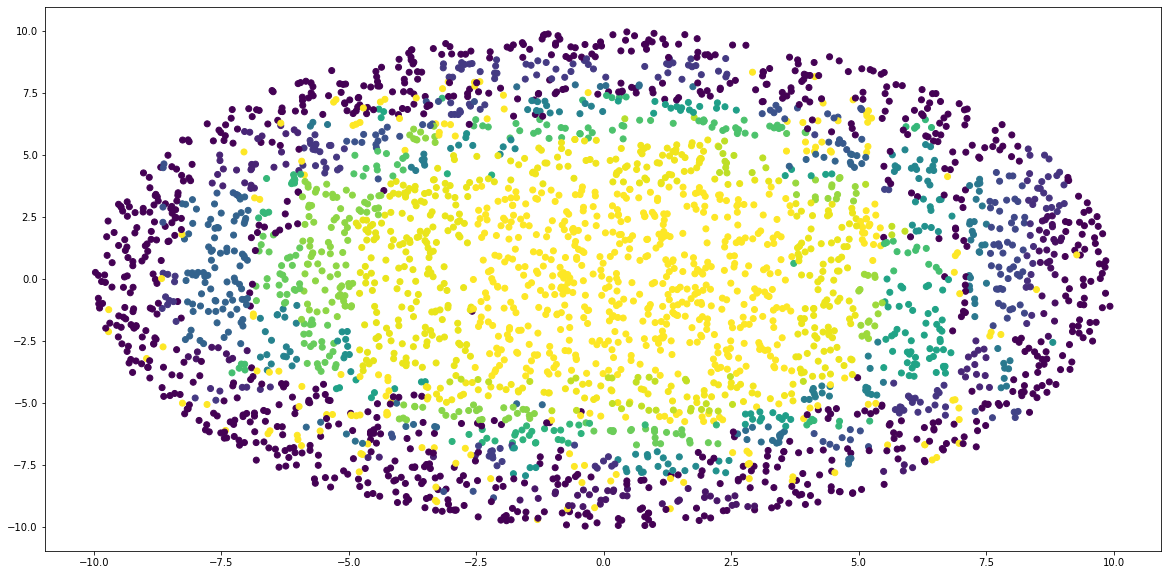

In [15]:
from sklearn.tree import DecisionTreeClassifier

#########################################

xmastree = DecisionTreeClassifier(max_depth=12) # ну например, можно погридсерчить
xmastree.fit(X_train, y_train)
predict_tree = xmastree.predict(X_test)
print(f'Точность нашей модели {accuracy_score(predict_tree, y_test)}')

predict_tree_proba = xmastree.predict_proba(X_test)[:, 1]

#########################################

plt.figure(figsize=(20,10))
plt.scatter(X_test['x1'], X_test['x2'], c = predict_tree_proba)
plt.show()

Прямо гридсерчить мне было лень, поэтому я примерно потыкала максимальную глубину дерева, на пятерке идеальный прямоугольник, на десятке начинает приближаться к правде, но одновременно выучивает выборку - это видно по желтым точкам в фиолетовом поясе. На 13 начинает быстро падать точность.

Поможет ли в данном случае ансамблирование? Когда в целом ансамбль дает хорошие результаты?

Ансамбли уменьшают разброс, сохраняя смещенность, то есть, очень немного поможет. Но совсем немного... (и зависит от рандома - на разных запусках то лучше, то так же)

Точность нашей модели 0.8178787878787879


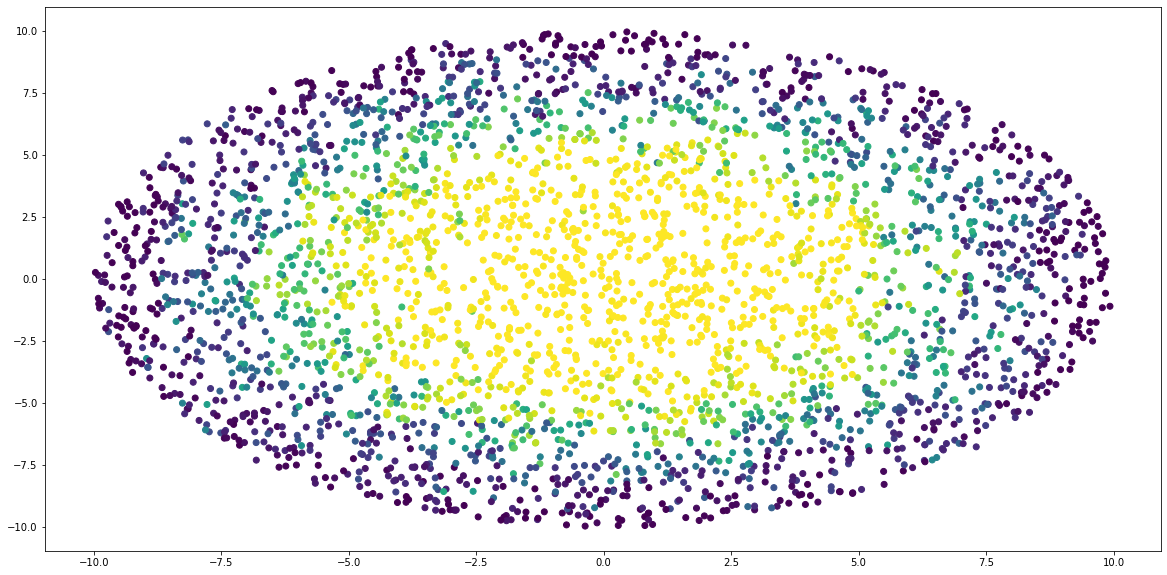

In [16]:
from sklearn.ensemble import RandomForestClassifier

#########################################
forest = RandomForestClassifier()
forest.fit(X_train, y_train)
predict_forest = forest.predict(X_test)
print(f'Точность нашей модели {accuracy_score(predict_forest, y_test)}')

predict_forest_proba = forest.predict_proba(X_test)[:, 1]

#########################################

plt.figure(figsize=(20, 10))
plt.scatter(X_test['x1'], X_test['x2'], c = predict_forest_proba)
plt.show()

ну и наконец мы добрались до нейронок - пора собрать нашу нейроночку под эту задачу.

Соберем простенькую нейронку - нам хватит 2х слоев по 5 нейронов в каждом. Смотрим на предыдущую тетрадку и копипастим все, что мы там видим! (можно для убыстрения процесса добавить callback с ранней остановкой)

In [8]:
# Подгружаем tensorflow 
import tensorflow as tf
keras = tf.keras

print(tf.__version__)
print(keras.__version__) 

from tensorflow.keras.models import Sequential   # Последовательность слоёв
import tensorflow.keras.layers as L              # Разные слои
import tensorflow.keras.optimizers as opt        # Оптимизаторы

2.5.2
2.5.0


In [23]:
#########################################
from tensorflow.keras.metrics import Accuracy

def get_new_model():
    acc = Accuracy()

    model = Sequential()

    model.add(L.Dense(5, input_dim=X_train.shape[1]))
    model.add(L.Activation('relu'))
    model.add(L.Dense(5))
    model.add(L.Activation('relu'))
    model.add(L.Dense(1))
    model.add(L.Activation('sigmoid'))

    optimizer = opt.RMSprop(learning_rate=1e-3)

    model.compile(loss='binary_crossentropy', 
    metrics=['acc'], 
    optimizer=optimizer)

    return model 

model = get_new_model()


predict_neural = model.fit(X_train, y_train, validation_split=0.2, epochs=30, verbose=1)
predict_classes = model.predict(X_test) > 0.5

print(f'Точность нашей модели {accuracy_score(predict_classes, y_test)}')
#########################################



Epoch 1/30
168/168 [==============================] - 1s 2ms/step - loss: 0.7392 - acc: 0.5326 - val_loss: 0.6479 - val_acc: 0.5910
Epoch 2/30
168/168 [==============================] - 0s 1ms/step - loss: 0.6433 - acc: 0.6132 - val_loss: 0.6291 - val_acc: 0.6545
Epoch 3/30
168/168 [==============================] - 0s 1ms/step - loss: 0.6245 - acc: 0.6642 - val_loss: 0.6101 - val_acc: 0.6873
Epoch 4/30
168/168 [==============================] - 0s 1ms/step - loss: 0.6061 - acc: 0.6987 - val_loss: 0.5908 - val_acc: 0.7112
Epoch 5/30
168/168 [==============================] - 0s 1ms/step - loss: 0.5881 - acc: 0.7172 - val_loss: 0.5739 - val_acc: 0.7381
Epoch 6/30
168/168 [==============================] - 0s 1ms/step - loss: 0.5689 - acc: 0.7431 - val_loss: 0.5520 - val_acc: 0.7485
Epoch 7/30
168/168 [==============================] - 0s 1ms/step - loss: 0.5481 - acc: 0.7573 - val_loss: 0.5314 - val_acc: 0.7791
Epoch 8/30
168/168 [==============================] - 0s 1ms/step - loss: 0.

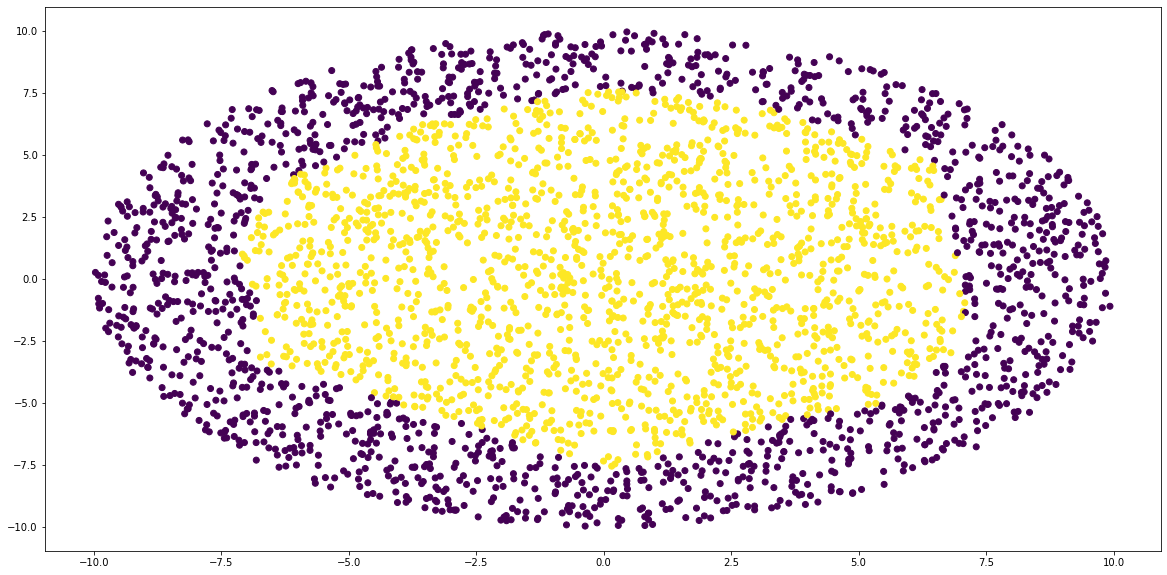

In [24]:
plt.figure(figsize=(20, 10))
plt.scatter(X_test['x1'], X_test['x2'], c = predict_classes)
plt.show()

Красивое...

На этом наше приключение сегодня закончилось. Вопросы максимально желательны :)

Дальше можно не смотреть, я просто хотела с торчем попрактиковаться

In [25]:
import torch
import torch.nn.functional as F
from torch import nn
import torch.optim as optim
import torch.utils.data as data_utils
from torchmetrics import Accuracy

In [26]:
INPUT_SIZE = 2
HIDDEN_SIZE = 5
OUTPUT_SIZE = 1
LEARNING_RATE = 1e-3
EPOCHS = 100
BATCH_SIZE = 64

In [155]:
def create_data_loader(X_train, y_train, X_test, y_test):
    train_tensor = data_utils.TensorDataset(torch.tensor(X_train.astype(np.float32)), torch.tensor(y_train))
    train_loader = data_utils.DataLoader(dataset=train_tensor,
                                         batch_size=64,
                                         shuffle=True)

    test_tensor = data_utils.TensorDataset(torch.tensor(X_test.astype(np.float32)), torch.tensor(y_test))
    test_loader = data_utils.DataLoader(dataset=test_tensor,
                                        batch_size=64,
                                        shuffle=False)
    return train_loader, test_loader

In [156]:
train_loader, test_loader = create_data_loader(X_train.to_numpy(), y_train.to_numpy(), X_test.to_numpy(), y_test.to_numpy()) 

In [175]:
class Torchic(nn.Module):
    def __init__(self):
        super().__init__()
        self.fc1 = nn.Linear(2, 5)
        self.fc2 = nn.Linear(5, 5)
        self.out = nn.Linear(5, 1)



    def forward(self, x):
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = torch.sigmoid(self.out(x))
        return x

In [198]:
def get_accuracy(y_true, y_prob):
    assert y_true.ndim == 1 and y_true.size() == y_prob.size()
    y_prob = y_prob > 0.5
    return (y_true == y_prob).sum().item() / y_true.size(0)

In [205]:
step = 0
train_loss_values = []
train_accuracy_values = []
valid_loss_values = []
valid_accuracy = []

def run_train():
    step = 0
    for epoch in range(80):
        running_loss = []
        running_acc = []
        for features, label in train_loader:
            # Reset gradients
            optimizer.zero_grad()

            output = torchic(features)
            # Calculate error and backpropagate
            loss = criterion(output, label.unsqueeze(1).float())
            loss.backward()
            # predictions = (output > 0.5).long()
            # acc = float((predictions == label).sum())/float(predictions.size(0))*100
            acc = accuracy(output.squeeze(), label).item()
            # acc = get_accuracy(output.squeeze(), label)

            # Update weights with gradients
            optimizer.step()

            running_loss.append(loss.item())
            running_acc.append(acc)

            step += 1

        train_loss_values.append(np.mean(running_loss))
        train_accuracy_values.append(np.mean(running_acc))
        if epoch % 20 == 0:
            print('EPOCH %d : train_loss: %f' % (epoch, train_loss_values[-1]))#, train_accuracy_values[-1]))


        # Run validation
        running_loss = []
        running_acc = []
        for features, label in test_loader:
            output = torchic(features)
            loss = criterion(output, label.unsqueeze(1).float())
            # predictions = (output > 0.5).long()
            # acc = float((predictions == label).sum())/float(predictions.size(0))*100
            acc = accuracy(output.squeeze(), label).item()
            # acc = get_accuracy(output.squeeze(), label)

            running_loss.append(loss.item())
            running_acc.append(acc)

        valid_loss_values.append(np.mean(running_loss))
        valid_accuracy.append(np.mean(running_acc))
        if epoch % 20 == 0:
            print('EPOCH %d : valid_loss: %f' % (epoch, valid_loss_values[-1]), (valid_accuracy[-1]))
        
    return train_loss_values, train_accuracy_values, valid_loss_values, valid_accuracy

In [208]:
torchic = Torchic()
criterion = nn.BCELoss()
accuracy = Accuracy()

optimizer = optim.Adam(torchic.parameters(), lr=0.001)

In [209]:
train_loss_values, train_accuracy_values, valid_loss_values, valid_accuracy = run_train()

EPOCH 0 : train_loss: 0.721989
EPOCH 0 : valid_loss: 0.704535 0.40224358955254924
EPOCH 20 : train_loss: 0.403692
EPOCH 20 : valid_loss: 0.389023 0.8503271902983005
EPOCH 40 : train_loss: 0.378722
EPOCH 40 : valid_loss: 0.361800 0.8507612175666369
EPOCH 60 : train_loss: 0.375253
EPOCH 60 : valid_loss: 0.356708 0.8500934827786225


In [210]:
with torch.no_grad():
    test_scores = torchic(torch.tensor(X_test.to_numpy().astype(np.float32)))

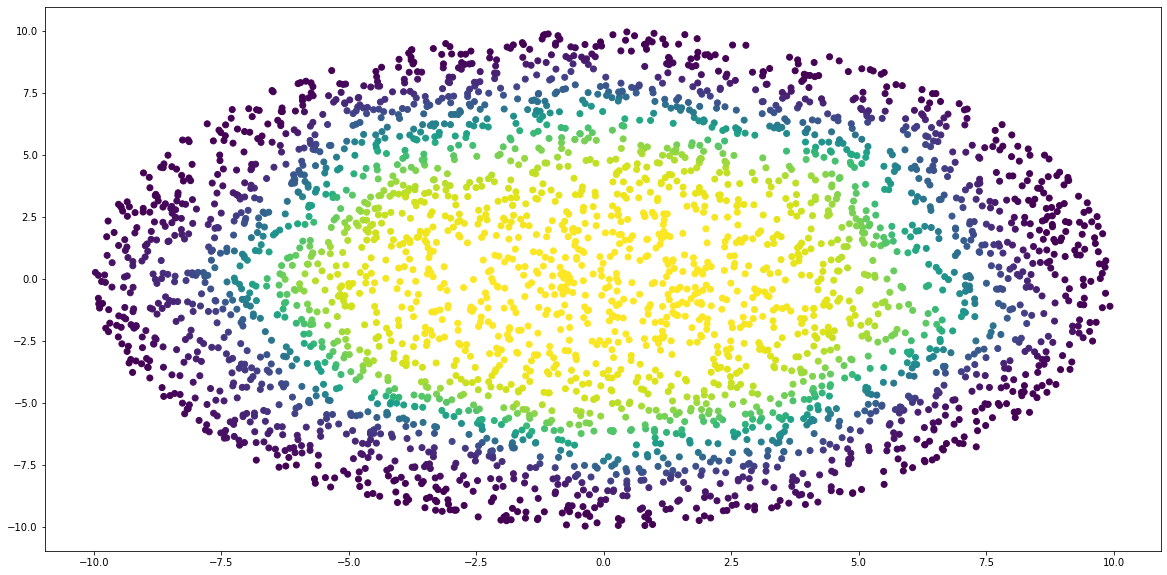

In [212]:
plt.figure(figsize=(20, 10))
plt.scatter(X_test['x1'], X_test['x2'], c = test_scores)
plt.show()